This notebook will show the impact of overfitting and underfitting when we are dealing with ML models.

# 1. Set up

# 2. Import necessary libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

# 3. Define global variables

# 4. Functions

In [51]:
def plot_polynomial_regression(X_train: np.ndarray, 
                               X_test: np.ndarray,
                               y_train: np.ndarray, 
                               y_test np.ndarray,
                               model, 
                               degree: int, 
                               title: str, 
                               poly_features):
    """
    Function to plot polynomial regression results in 2D.
    
    Parameters:
        - X_train: Training data for X.
        - X_test: Testing data for X.
        - y_train: Training labels.
        - y_test: Testing labels.
        - model: The trained polynomial regression model.
        - degree: Degree of the polynomial regression.
        - title: Title of the plot.
        - poly_features: The PolynomialFeatures instance used for transformation.
    """
    plt.figure(figsize=(8, 6))
    
    # Puntos de datos
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='green', label='Test data')

    # Predicciones en un rango continuo
    X_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    X_range_poly = poly_features.transform(X_range)
    y_range = model.predict(X_range_poly)

    # Curva del modelo
    plt.plot(X_range, y_range, color='red', label=f'Polynomial Degree {degree}')
    
    # Etiquetas y leyenda
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# 5. Code

First of all, we need to create the synthetic data. In order to create it, we need to set a random seed.

In [52]:
np.random.seed(42)

In [53]:
X = np.linspace(-5, 5, 100)
y = X**2 + np.random.normal(0, 2, size=X.shape)

Let's show a plot of the data:

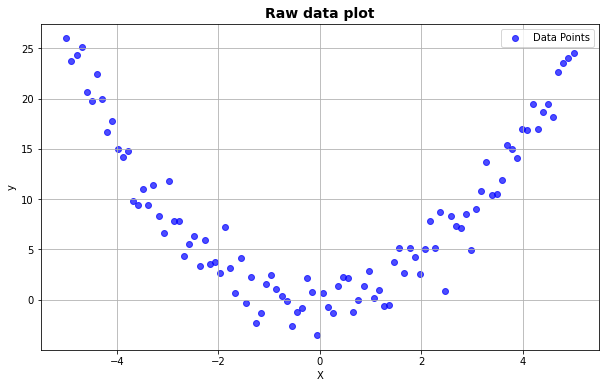

In [54]:
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.7)

# Title and labels
plt.title("Raw data plot", fontsize=14, fontweight='bold')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Let's divide now the data into training and test sets. Our idea is to create two different models, an overfitted one and an underfitted one. This will give us a clear understanding of how these two different concepts act.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape

(80,)

Both X_train and X_test need to be reshaped because a single column of data is demanded when fitting a model

In [57]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [58]:
X_train.shape

(80, 1)

Let's dive into underfitting this time:

## 5.1. Underfitting

In order to show underfitting, we are going to fit a linear regression. Thus, we will consider a polynomial regression of degree 1.

In [59]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

Let's generate predictions and metrics now:

In [60]:
train_preds = linear_reg.predict(X_train)
test_preds = linear_reg.predict(X_test)

In [61]:
train_mse = round(mean_squared_error(y_train, train_preds), 2)
test_mse = round(mean_squared_error(y_test, test_preds), 2)

Finally, making use of the function defined before, we can plot the result:

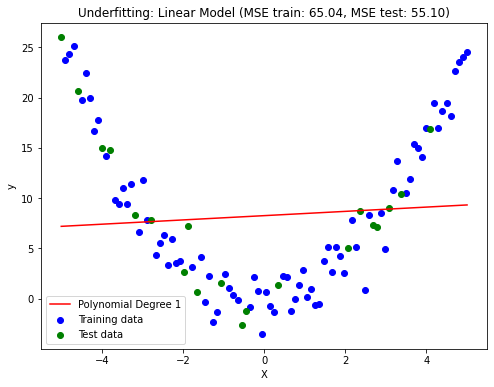

In [63]:
plot_model_predictions(
    X_train, X_test, y_train, y_test, 
    linear_reg, 1, 
    f"Underfitting: Linear Model (MSE train: {train_mse}, MSE test: {test_mse:.2f})")

Clearly we are in front of an underfitting case. The line does not fit at all our data points and the performance of the model is very poor as can be seen by MSE metrics in train and test sets. Let's dive now into an overfitting case:

## 5.2. Overfitting

Let's consider now a high degree polynomial regression in order to look for overfitting:

In [64]:
degree = 22

poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

Let's train the model:

In [65]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [69]:
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)
train_mse = round(mean_squared_error(y_train, y_train_pred), 2)
test_mse = round(mean_squared_error(y_test, y_test_pred), 2)

Let's plot now our model against the data:

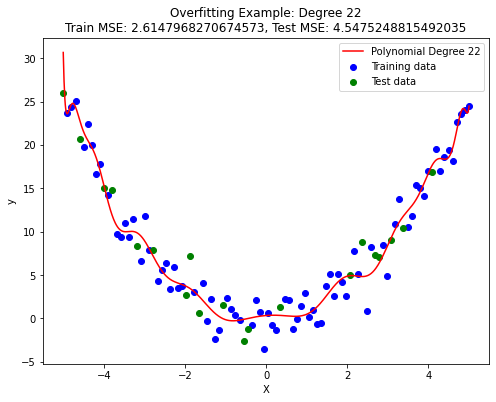

In [68]:
plot_polynomial_regression(
    X_train, X_test, y_train, y_test, 
    poly_reg, degree, 
    f"Overfitting Example: Degree {degree}\nTrain MSE: {train_mse}, Test MSE: {test_mse}", 
    poly_features
)

Thus, we can observe that the model (red line) fits the training data extremely well, as reflected by the low Train MSE (2.61). However, the model performs poorly on the test data, as indicated by the higher Test MSE (4.55).

If we consider a new data point now, a little bit different from training data, the error will be quite high due to overfitting. Thus, our main goal when training a model should be to look for generalization.